# SAMe System - Демонстрация работы модулей

**Search Analog Model Engine** - система поиска аналогов материально-технических ресурсов

Этот notebook демонстрирует работу основных модулей системы SAMe:
- Предобработка текста
- Поисковые алгоритмы
- Извлечение параметров
- Экспорт результатов
- Интеграционные примеры

---

## 1. Настройка и импорты

Загружаем все необходимые модули системы SAMe и настраиваем окружение.

In [1]:
# Системные импорты
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import List, Dict, Any
import time
from datetime import datetime

# Настройка отображения
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Добавляем путь к модулям SAMe
sys.path.append(os.path.abspath('../../src'))
sys.path.append(os.path.abspath('../..'))

print("✅ Базовые импорты загружены")
print(f"📁 Рабочая директория: {os.getcwd()}")
print(f"🕐 Время запуска: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Базовые импорты загружены
📁 Рабочая директория: /Users/igor/Desktop/PythonProjects/SAMe/notebooks/demo
🕐 Время запуска: 2025-07-18 02:27:23


In [ ]:
# Импорты модулей SAMe - Предобработка текста
try:
    from same.text_processing.text_cleaner import TextCleaner, CleaningConfig
    from same.text_processing.lemmatizer import Lemmatizer, LemmatizerConfig
    from same.text_processing.normalizer import TextNormalizer, NormalizerConfig
    from same.text_processing.preprocessor import TextPreprocessor, PreprocessorConfig
    print("✅ Модули предобработки текста загружены")
except ImportError as e:
    print(f"❌ Ошибка импорта модулей предобработки: {e}")
    print("💡 Убедитесь что модули созданы в директории same/text_processing/")

✅ Модули предобработки текста загружены


In [ ]:
# Импорты модулей SAMe - Поисковые алгоритмы
try:
    from same.search_engine.fuzzy_search import FuzzySearchEngine, FuzzySearchConfig
    from same.search_engine.semantic_search import SemanticSearchEngine, SemanticSearchConfig
    from same.search_engine.hybrid_search import HybridSearchEngine, HybridSearchConfig
    from same.search_engine.indexer import SearchIndexer, IndexConfig
    print("✅ Модули поисковых алгоритмов загружены")
except ImportError as e:
    print(f"❌ Ошибка импорта поисковых модулей: {e}")
    print("💡 Убедитесь что модули созданы в директории same/search_engine/")

✅ Модули поисковых алгоритмов загружены


In [ ]:
# Импорты модулей SAMe - Извлечение параметров
try:
    from same.parameter_extraction.regex_extractor import (
        RegexParameterExtractor, ParameterPattern, ParameterType, ExtractedParameter
    )
    from same.parameter_extraction.ml_extractor import MLParameterExtractor, MLExtractorConfig
    from same.parameter_extraction.parameter_parser import ParameterParser, ParameterParserConfig
    print("✅ Модули извлечения параметров загружены")
except ImportError as e:
    print(f"❌ Ошибка импорта модулей извлечения параметров: {e}")
    print("💡 Убедитесь что модули созданы в директории same/parameter_extraction/")

✅ Модули извлечения параметров загружены


In [ ]:
# Импорты модулей SAMe - Экспорт
try:
    from same.export.excel_exporter import ExcelExporter, ExcelExportConfig
    from same.export.report_generator import ReportGenerator, ReportConfig
    print("✅ Модули экспорта загружены")
except ImportError as e:
    print(f"❌ Ошибка импорта модулей экспорта: {e}")
    print("💡 Убедитесь что модули созданы в директории same/export/")

✅ Модули экспорта загружены


In [6]:
# Создание тестовых данных МТР
def create_sample_mtr_data():
    """Создает реалистичные тестовые данные МТР"""
    
    sample_data = [
        # Крепежные изделия
        "Болт М10×50 ГОСТ 7798-70 оцинкованный",
        "Болт с шестигранной головкой М12×60 DIN 933 нержавеющая сталь A2",
        "Винт М8×30 с внутренним шестигранником ГОСТ 11738-84",
        "Гайка М10 шестигранная ГОСТ 5915-70 класс прочности 8",
        "Гайка М12 DIN 934 нержавеющая сталь A4",
        "Шайба плоская 10 ГОСТ 11371-78 оцинкованная",
        "Шайба пружинная (гровер) 12 ГОСТ 6402-70",
        "Шпилька резьбовая М16×100 ГОСТ 22032-76",
        
        # Электрооборудование
        "Двигатель асинхронный АИР80В2 1.5кВт 3000об/мин 220/380В",
        "Электродвигатель 4АМ100L4 4кВт 1500об/мин лапы",
        "Двигатель постоянного тока П-31 0.37кВт 1500об/мин 110В",
        "Кабель ВВГ 3×2.5 мм² 0.66кВ медный",
        "Провод ПВС 2×1.5 мм² гибкий медный",
        "Кабель силовой АВБбШв 4×25 мм² 10кВ алюминиевый",
        "Автоматический выключатель ВА47-29 С16 1П IEK",
        "Контактор КМИ-23210 25А 220В AC3 IEK",
        
        # Трубопроводная арматура
        "Труба стальная 57×3.5 ГОСТ 8732-78 бесшовная",
        "Труба полипропиленовая PN20 32×5.4 для горячей воды",
        "Фланец плоский ДУ50 РУ16 ГОСТ 12820-80 сталь 20",
        "Клапан шаровой ДУ25 РУ40 муфтовый латунь",
        "Задвижка чугунная ДУ100 РУ16 фланцевая 30ч76бр",
        "Вентиль запорный ДУ15 РУ16 муфтовый 15кч11р",
        "Обратный клапан ДУ32 РУ16 муфтовый 16кч9п",
        
        # Подшипники и детали машин
        "Подшипник шариковый 6205 2RS (25×52×15) ГОСТ 8338-75",
        "Подшипник роликовый конический 7208А (40×80×18)",
        "Ремень клиновой А-1000 ГОСТ 1284.1-89",
        "Цепь приводная ПР-15.875-2300 (1 дюйм) ГОСТ 13568-97",
        "Муфта упругая МУВП-4 d=40мм",
        "Редуктор червячный Ч-80 передаточное число 40",
        
        # Измерительные приборы
        "Манометр показывающий МП3-У 0-10 кгс/см² М20×1.5",
        "Термометр биметаллический ТБ-63 0-120°C L=100мм",
        "Расходомер электромагнитный ПРЭ-10 ДУ50",
        "Датчик давления Метран-100 0-1.6МПа 4-20мА",
        
        # Насосы и компрессоры
        "Насос центробежный К50-32-125 подача 12.5м³/ч напор 20м",
        "Насос погружной ЭЦВ6-10-110 подача 10м³/ч напор 110м",
        "Компрессор поршневой СО-7Б производительность 0.7м³/мин",
        "Вентилятор радиальный ВР-80-75 №5 1500об/мин"
    ]
    
    return sample_data

# Создаем тестовые данные
sample_mtr_data = create_sample_mtr_data()

print(f"✅ Создано {len(sample_mtr_data)} образцов МТР для демонстрации")
print("\n📋 Примеры данных:")
for i, item in enumerate(sample_mtr_data[:5], 1):
    print(f"{i}. {item}")
print("...")

✅ Создано 37 образцов МТР для демонстрации

📋 Примеры данных:
1. Болт М10×50 ГОСТ 7798-70 оцинкованный
2. Болт с шестигранной головкой М12×60 DIN 933 нержавеющая сталь A2
3. Винт М8×30 с внутренним шестигранником ГОСТ 11738-84
4. Гайка М10 шестигранная ГОСТ 5915-70 класс прочности 8
5. Гайка М12 DIN 934 нержавеющая сталь A4
...


---
## 2. Демонстрация предобработки текста

Модули предобработки текста отвечают за очистку, нормализацию и лемматизацию технических наименований МТР.

### 2.1 TextCleaner - Очистка текста

Удаляет HTML теги, специальные символы, нормализует пробелы.

In [7]:
# Демонстрация TextCleaner
print("🧹 Демонстрация TextCleaner")
print("=" * 50)

# Создаем конфигурацию и экземпляр очистителя
cleaning_config = CleaningConfig(
    remove_html=True,
    remove_special_chars=True,
    remove_extra_spaces=True,
    remove_numbers=False
)

text_cleaner = TextCleaner(cleaning_config)

# Тестовые примеры с "грязным" текстом
dirty_samples = [
    "<p>Болт М10×50 @#$% ГОСТ 7798-70</p>",
    "Двигатель    АИР80В2     1.5кВт   !!!   3000об/мин",
    "КАБЕЛЬ ВВГ 3×2.5 мм² &nbsp; 0.66кВ <b>медный</b>",
    "Труба стальная 57×3.5    ГОСТ 8732-78   (бесшовная)"
]

print("\n📝 Примеры очистки текста:")
cleaning_results = []

for i, dirty_text in enumerate(dirty_samples, 1):
    result = text_cleaner.clean_text(dirty_text)
    cleaning_results.append(result)
    
    print(f"\n{i}. Исходный текст:")
    print(f"   '{dirty_text}'")
    print(f"   Очищенный текст:")
    print(f"   '{result['normalized']}'")
    print(f"   Сжатие: {len(dirty_text)} → {len(result['normalized'])} символов")

# Статистика очистки
print("\n📊 Статистика очистки:")
total_original = sum(len(r['raw']) for r in cleaning_results)
total_cleaned = sum(len(r['normalized']) for r in cleaning_results)
compression_ratio = (total_original - total_cleaned) / total_original * 100

print(f"Общее сжатие: {compression_ratio:.1f}%")
print(f"Символов удалено: {total_original - total_cleaned}")

🧹 Демонстрация TextCleaner

📝 Примеры очистки текста:

1. Исходный текст:
   '<p>Болт М10×50 @#$% ГОСТ 7798-70</p>'
   Очищенный текст:
   'Болт М10 50 ГОСТ 7798-70'
   Сжатие: 36 → 24 символов

2. Исходный текст:
   'Двигатель    АИР80В2     1.5кВт   !!!   3000об/мин'
   Очищенный текст:
   'Двигатель АИР80В2 1.5кВт 3000об мин'
   Сжатие: 50 → 35 символов

3. Исходный текст:
   'КАБЕЛЬ ВВГ 3×2.5 мм² &nbsp; 0.66кВ <b>медный</b>'
   Очищенный текст:
   'КАБЕЛЬ ВВГ 3 2.5 мм² 0.66кВ медный'
   Сжатие: 48 → 34 символов

4. Исходный текст:
   'Труба стальная 57×3.5    ГОСТ 8732-78   (бесшовная)'
   Очищенный текст:
   'Труба стальная 57 3.5 ГОСТ 8732-78 (бесшовная)'
   Сжатие: 51 → 46 символов

📊 Статистика очистки:
Общее сжатие: 24.9%
Символов удалено: 46


### 2.2 TextNormalizer - Нормализация технических терминов

Приводит технические термины к стандартному виду, нормализует единицы измерения.

In [8]:
# Демонстрация TextNormalizer
print("🔧 Демонстрация TextNormalizer")
print("=" * 50)

# Создаем конфигурацию и экземпляр нормализатора
normalizer_config = NormalizerConfig(

    normalize_abbreviations=True,
    unify_technical_terms=True
)

text_normalizer = TextNormalizer(normalizer_config)

# Примеры для нормализации
normalization_samples = [
    "эл двигатель 4 киловатта 1500 оборотов в минуту",
    "труба диаметр 57 миллиметров толщина 3.5 мм",
    "кабель сечение 2.5 квадратных миллиметра напряжение 660 вольт",
    "насос производительность 12.5 кубических метров в час"
]

print("\n📝 Примеры нормализации:")
normalization_results = []

for i, text in enumerate(normalization_samples, 1):
    result = text_normalizer.normalize_text(text)
    normalization_results.append(result)
    
    print(f"\n{i}. Исходный текст:")
    print(f"   '{text}'")
    print(f"   Нормализованный:")
    print(f"   '{result['final_normalized']}'")
    
    # Показываем извлеченные технические характеристики
    specs = text_normalizer.extract_technical_specs(text)
    if specs:
        print(f"   Технические характеристики: {', '.join(specs)}")

print("\n📊 Статистика нормализации:")
print(f"Обработано текстов: {len(normalization_results)}")
print(f"Средняя длина до нормализации: {np.mean([len(r['original']) for r in normalization_results]):.1f}")
print(f"Средняя длина после нормализации: {np.mean([len(r['final_normalized']) for r in normalization_results]):.1f}")

🔧 Демонстрация TextNormalizer

📝 Примеры нормализации:

1. Исходный текст:
   'эл двигатель 4 киловатта 1500 оборотов в минуту'
   Нормализованный:
   'электрический двигатель 4 кВт 1500 оборотов в минуту'

2. Исходный текст:
   'труба диаметр 57 миллиметров толщина 3.5 мм'
   Нормализованный:
   'труба диаметр 57 мм толщина 3.5 мм'

3. Исходный текст:
   'кабель сечение 2.5 квадратных миллиметра напряжение 660 вольт'
   Нормализованный:
   'кабель сечение 2.5 квадратных мм напряжение 660 В'

4. Исходный текст:
   'насос производительность 12.5 кубических метров в час'
   Нормализованный:
   'насос производительность 12.5 кубических м в час'

📊 Статистика нормализации:
Обработано текстов: 4
Средняя длина до нормализации: 51.0
Средняя длина после нормализации: 45.8


### 2.3 Lemmatizer - Лемматизация

Приводит слова к их начальной форме с использованием SpaCy.

In [9]:
# Демонстрация Lemmatizer
print("📚 Демонстрация Lemmatizer")
print("=" * 50)

# Создаем конфигурацию и экземпляр лемматизатора
lemmatizer_config = LemmatizerConfig(
    model_name="ru_core_news_lg",
    preserve_technical_terms=True,
    min_token_length=2
)

try:
    lemmatizer = Lemmatizer(lemmatizer_config)
    
    # Примеры для лемматизации
    lemmatization_samples = [
        "болты с шестигранными головками",
        "двигатели асинхронные трехфазные",
        "трубы стальные бесшовные",
        "насосы центробежные погружные"
    ]
    
    print("\n📝 Примеры лемматизации:")
    lemmatization_results = []
    
    for i, text in enumerate(lemmatization_samples, 1):
        result = lemmatizer.lemmatize_text(text)
        lemmatization_results.append(result)
        
        print(f"\n{i}. Исходный текст: '{text}'")
        print(f"   Лемматизированный: '{result['lemmatized']}'")
        print(f"   Токены: {result['tokens']}")
        print(f"   Леммы: {result['lemmas']}")
    
    # Статистика лемматизации
    print("\n📊 Статистика лемматизации:")
    total_tokens = sum(len(r['tokens']) for r in lemmatization_results)
    unique_lemmas = set()
    for r in lemmatization_results:
        unique_lemmas.update(r['lemmas'])
    
    print(f"Всего токенов: {total_tokens}")
    print(f"Уникальных лемм: {len(unique_lemmas)}")
    print(f"Сжатие словаря: {(1 - len(unique_lemmas)/total_tokens)*100:.1f}%")
    
except Exception as e:
    print(f"❌ Ошибка инициализации лемматизатора: {e}")
    print("💡 Убедитесь что установлена модель SpaCy: python -m spacy download ru_core_news_lg")

📚 Демонстрация Lemmatizer



📝 Примеры лемматизации:

1. Исходный текст: 'болты с шестигранными головками'
   Лемматизированный: 'болт шестигранными головка'
   Токены: ['болты', 'с', 'шестигранными', 'головками']
   Леммы: ['болт', 'с', 'шестигранными', 'головка']

2. Исходный текст: 'двигатели асинхронные трехфазные'
   Лемматизированный: 'двигатель асинхронный трехфазные'
   Токены: ['двигатели', 'асинхронные', 'трехфазные']
   Леммы: ['двигатель', 'асинхронный', 'трехфазные']

3. Исходный текст: 'трубы стальные бесшовные'
   Лемматизированный: 'труба стальной бесшовный'
   Токены: ['трубы', 'стальные', 'бесшовные']
   Леммы: ['труба', 'стальной', 'бесшовный']

4. Исходный текст: 'насосы центробежные погружные'
   Лемматизированный: 'насос центробежный погружной'
   Токены: ['насосы', 'центробежные', 'погружные']
   Леммы: ['насос', 'центробежный', 'погружной']

📊 Статистика лемматизации:
Всего токенов: 13
Уникальных лемм: 13
Сжатие словаря: 0.0%


### 2.4 TextPreprocessor - Полный пайплайн предобработки

Объединяет все этапы предобработки в единый пайплайн.

🔄 Демонстрация TextPreprocessor (полный пайплайн)



📝 Примеры полной предобработки:

1. Исходный текст:
   'Болт М10×50 ГОСТ 7798-70 оцинкованный'
   Финальный результат:
   'болт м10 50 гост 7798 70 оцинкованный'
   Время обработки: 5.2мс
   Успешно: ✅

2. Исходный текст:
   'Болт с шестигранной головкой М12×60 DIN 933 нержавеющая сталь A2'
   Финальный результат:
   'болт шестигранной головка м12 60 din 933 нержавеющий сталь a2'
   Время обработки: 4.2мс
   Успешно: ✅

3. Исходный текст:
   'Винт М8×30 с внутренним шестигранником ГОСТ 11738-84'
   Финальный результат:
   'винт м8 30 внутренний шестигранник гост 11738 84'
   Время обработки: 3.6мс
   Успешно: ✅

4. Исходный текст:
   'Гайка М10 шестигранная ГОСТ 5915-70 класс прочности 8'
   Финальный результат:
   'гайка м10 шестигранная гост 5915 70 класс прочность'
   Время обработки: 3.6мс
   Успешно: ✅

5. Исходный текст:
   'Гайка М12 DIN 934 нержавеющая сталь A4'
   Финальный результат:
   'гайка м12 din 934 нержавеющий сталь a4'
   Время обработки: 2.6мс
   Успешно: ✅

6. Исхо

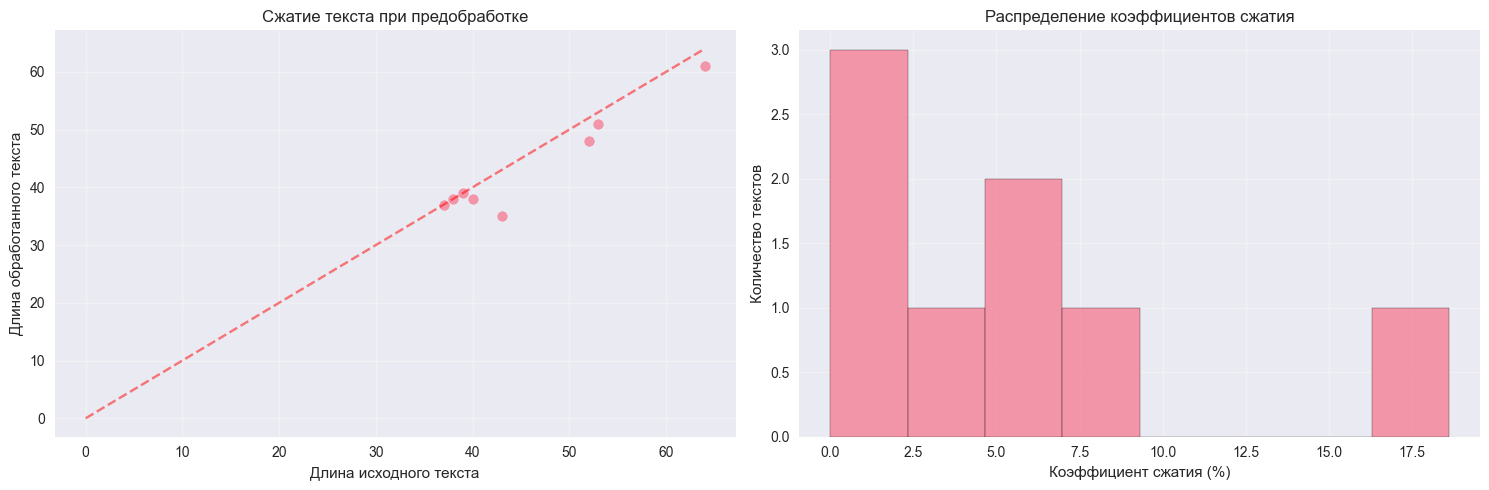

In [10]:
# Демонстрация полного пайплайна предобработки
print("🔄 Демонстрация TextPreprocessor (полный пайплайн)")
print("=" * 60)

# Создаем конфигурацию для полного пайплайна
cleaning_config = CleaningConfig(
    remove_html=True,
    remove_special_chars=True,
    remove_extra_spaces=True,
    remove_numbers=False,
    preserve_technical_terms=True
)

lemmatizer_config = LemmatizerConfig(
    model_name="ru_core_news_lg",
    preserve_technical_terms=True,
    min_token_length=2,
    preserve_numbers=True
)

normalizer_config = NormalizerConfig(
    standardize_units=True,
    normalize_abbreviations=True,
    unify_technical_terms=True,
    remove_brand_names=False,
    standardize_numbers=True
)

# Создаем правильную конфигурацию предобработчика
preprocessor_config = PreprocessorConfig(
    cleaning_config=cleaning_config,
    lemmatizer_config=lemmatizer_config,
    normalizer_config=normalizer_config,
    save_intermediate_steps=True,
    batch_size=1000
)

try:
    text_preprocessor = TextPreprocessor(preprocessor_config)
    
    # Выбираем несколько примеров из наших тестовых данных
    preprocessing_samples = sample_mtr_data[:8]
    
    print("\n📝 Примеры полной предобработки:")
    preprocessing_results = []
    
    for i, text in enumerate(preprocessing_samples, 1):
        start_time = time.time()
        result = text_preprocessor.preprocess_text(text)
        processing_time = time.time() - start_time
        
        preprocessing_results.append(result)
        
        print(f"\n{i}. Исходный текст:")
        print(f"   '{text}'")
        print(f"   Финальный результат:")
        print(f"   '{result['final_text']}'")
        print(f"   Время обработки: {processing_time*1000:.1f}мс")
        print(f"   Успешно: {'✅' if result['processing_successful'] else '❌'}")
    
    # Создаем DataFrame для анализа
    df_preprocessing = pd.DataFrame({
        'original': [r['original'] for r in preprocessing_results],
        'final_text': [r['final_text'] for r in preprocessing_results],
        'success': [r['processing_successful'] for r in preprocessing_results],
        'original_length': [len(r['original']) for r in preprocessing_results],
        'final_length': [len(r['final_text']) for r in preprocessing_results]
    })
    
    df_preprocessing['compression_ratio'] = (
        (df_preprocessing['original_length'] - df_preprocessing['final_length']) / 
        df_preprocessing['original_length'] * 100
    )
    
    print("\n📊 Статистика предобработки:")
    print(f"Успешно обработано: {df_preprocessing['success'].sum()}/{len(df_preprocessing)}")
    print(f"Среднее сжатие текста: {df_preprocessing['compression_ratio'].mean():.1f}%")
    print(f"Средняя длина до: {df_preprocessing['original_length'].mean():.1f} символов")
    print(f"Средняя длина после: {df_preprocessing['final_length'].mean():.1f} символов")
    
    # Визуализация результатов предобработки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # График длин текстов
    ax1.scatter(df_preprocessing['original_length'], df_preprocessing['final_length'], alpha=0.7)
    ax1.plot([0, df_preprocessing['original_length'].max()], [0, df_preprocessing['original_length'].max()], 'r--', alpha=0.5)
    ax1.set_xlabel('Длина исходного текста')
    ax1.set_ylabel('Длина обработанного текста')
    ax1.set_title('Сжатие текста при предобработке')
    ax1.grid(True, alpha=0.3)
    
    # Гистограмма коэффициентов сжатия
    ax2.hist(df_preprocessing['compression_ratio'], bins=8, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Коэффициент сжатия (%)')
    ax2.set_ylabel('Количество текстов')
    ax2.set_title('Распределение коэффициентов сжатия')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"❌ Ошибка в пайплайне предобработки: {e}")
    print("💡 Проверьте что все модули предобработки корректно импортированы")

---
## 3. Демонстрация поисковых алгоритмов

Система SAMe поддерживает три типа поиска: нечеткий, семантический и гибридный.

### 3.1 Подготовка тестового каталога

Создаем каталог МТР для демонстрации поисковых алгоритмов.

In [11]:
# Подготовка тестового каталога
print("📚 Подготовка тестового каталога МТР")
print("=" * 50)

# Создаем расширенный каталог с дополнительными данными
def create_extended_catalog():
    """Создает расширенный каталог МТР с метаданными"""
    
    catalog_data = []
    
    # Добавляем наши основные данные
    for i, item in enumerate(sample_mtr_data):
        catalog_data.append({
            'id': i + 1,
            'name': item,
            'category': 'МТР',
            'description': f'Описание для {item}'
        })
    
    # Добавляем дополнительные вариации для демонстрации поиска
    additional_items = [
        "Болт М10 длина 50мм оцинкованный",
        "Болт метрический 10х50 ГОСТ",
        "Винт М10х50 с шестигранной головкой",
        "Двигатель электрический 1.5кВт 3000об/мин",
        "Мотор асинхронный 1500Вт трехфазный",
        "Электродвигатель 1.5кВт АИР серии",
        "Труба стальная диаметр 57мм",
        "Трубка металлическая 57х3.5",
        "Труба бесшовная сталь 57*3.5мм"
    ]
    
    for i, item in enumerate(additional_items):
        catalog_data.append({
            'id': len(sample_mtr_data) + i + 1,
            'name': item,
            'category': 'МТР',
            'description': f'Дополнительное описание для {item}'
        })
    
    return catalog_data

# Создаем каталог
catalog_data = create_extended_catalog()
catalog_df = pd.DataFrame(catalog_data)

print(f"✅ Создан каталог из {len(catalog_data)} позиций")
print(f"📊 Структура каталога:")
print(catalog_df.head(10))

# Подготавливаем данные для поисковых движков
documents = catalog_df['name'].tolist()
document_ids = catalog_df['id'].tolist()

# Предобрабатываем документы для обучения поисковых движков
print(f"\n🔄 Предобработка документов для поисковых движков...")
if 'text_preprocessor' in locals():
    preprocessed_documents = []
    for doc in documents:
        try:
            result = text_preprocessor.preprocess_text(doc)
            preprocessed_documents.append(result['final_text'])
        except:
            # Если предобработка не удалась, используем исходный текст
            preprocessed_documents.append(doc.lower())
    print(f"✅ Предобработано {len(preprocessed_documents)} документов")
else:
    # Если предобработчик недоступен, используем простую нормализацию
    preprocessed_documents = [doc.lower() for doc in documents]
    print(f"⚠️  Использована простая нормализация для {len(preprocessed_documents)} документов")

print(f"\n🔍 Подготовлено для поиска:")
print(f"Исходных документов: {len(documents)}")
print(f"Предобработанных документов: {len(preprocessed_documents)}")
print(f"ID документов: {len(document_ids)}")

# Показываем примеры предобработки
print(f"\n📝 Примеры предобработки документов:")
for i in range(min(3, len(documents))):
    print(f"{i+1}. Исходный: '{documents[i]}'")
    print(f"   Обработанный: '{preprocessed_documents[i]}'")

📚 Подготовка тестового каталога МТР
✅ Создан каталог из 46 позиций
📊 Структура каталога:
   id                                               name category  \
0   1              Болт М10×50 ГОСТ 7798-70 оцинкованный      МТР   
1   2  Болт с шестигранной головкой М12×60 DIN 933 не...      МТР   
2   3  Винт М8×30 с внутренним шестигранником ГОСТ 11...      МТР   
3   4  Гайка М10 шестигранная ГОСТ 5915-70 класс проч...      МТР   
4   5             Гайка М12 DIN 934 нержавеющая сталь A4      МТР   
5   6        Шайба плоская 10 ГОСТ 11371-78 оцинкованная      МТР   
6   7           Шайба пружинная (гровер) 12 ГОСТ 6402-70      МТР   
7   8            Шпилька резьбовая М16×100 ГОСТ 22032-76      МТР   
8   9  Двигатель асинхронный АИР80В2 1.5кВт 3000об/ми...      МТР   
9  10     Электродвигатель 4АМ100L4 4кВт 1500об/мин лапы      МТР   

                                         description  
0  Описание для Болт М10×50 ГОСТ 7798-70 оцинкова...  
1  Описание для Болт с шестигранной голов

### 3.2 FuzzySearchEngine - Нечеткий поиск

Использует TF-IDF векторизацию и косинусное сходство для поиска похожих документов.

In [12]:
# Демонстрация нечеткого поиска
print("🔍 Демонстрация FuzzySearchEngine")
print("=" * 50)

# Создаем конфигурацию для нечеткого поиска
fuzzy_config = FuzzySearchConfig(
    tfidf_max_features=5000,
    similarity_threshold=0.1,
    max_results=5,
    use_stemming=True
)

try:
    # Создаем и обучаем движок нечеткого поиска
    fuzzy_engine = FuzzySearchEngine(fuzzy_config)
    
    print("🔄 Обучение нечеткого поискового движка...")
    start_time = time.time()
    # Используем предобработанные документы для обучения
    if 'preprocessed_documents' in locals():
        fuzzy_engine.fit(preprocessed_documents, document_ids)
        print("   📝 Использованы предобработанные документы")
    else:
        fuzzy_engine.fit(documents, document_ids)
        print("   📝 Использованы исходные документы")
    fit_time = time.time() - start_time
    print(f"✅ Обучение завершено за {fit_time:.2f} секунд")
    
    # Тестовые запросы для сравнения всех методов
    comparison_queries = [
        "болт м10",
        "двигатель 1.5кВт",
        "труба стальная"
    ]
    
    # Дополнительные запросы для нечеткого поиска
    test_queries = comparison_queries + [
        "насос центробежный",
        "кабель медный"
    ]
    
    print("\n📝 Результаты нечеткого поиска:")
    fuzzy_results = {}
    
    for query in test_queries:
        start_time = time.time()
        results = fuzzy_engine.search(query)
        search_time = time.time() - start_time
        
        fuzzy_results[query] = results
        
        print(f"\n🔍 Запрос: '{query}'")
        print(f"   Время поиска: {search_time*1000:.1f}мс")
        print(f"   Найдено результатов: {len(results)}")
        
        for i, result in enumerate(results[:3], 1):
            print(f"   {i}. {result['document']} (схожесть: {result['combined_score']:.3f})")
    
    # Статистика нечеткого поиска
    stats = fuzzy_engine.get_statistics()
    print(f"\n📊 Статистика нечеткого поиска:")
    print(f"Статус: {stats['status']}")
    print(f"Документов в индексе: {stats['total_documents']}")
    print(f"Размер словаря: {stats['vocabulary_size']}")
    
except Exception as e:
    print(f"❌ Ошибка в нечетком поиске: {e}")
    fuzzy_results = {}

🔍 Демонстрация FuzzySearchEngine
🔄 Обучение нечеткого поискового движка...
   📝 Использованы предобработанные документы
✅ Обучение завершено за 0.02 секунд

📝 Результаты нечеткого поиска:

🔍 Запрос: 'болт м10'
   Время поиска: 5.8мс
   Найдено результатов: 2
   1. болт м10 длина 50 мм оцинкованный (схожесть: 0.695)
   2. болт м10 50 гост 7798 70 оцинкованный (схожесть: 0.671)

🔍 Запрос: 'двигатель 1.5кВт'
   Время поиска: 0.3мс
   Найдено результатов: 2
   1. двигатель электрический 1.5 квт 3000 мин (схожесть: 0.539)
   2. двигатель асинхронный аир80 в2 1.5 квт 3000 мин 220 380 (схожесть: 0.491)

🔍 Запрос: 'труба стальная'
   Время поиска: 0.3мс
   Найдено результатов: 3
   1. труба стальной диаметр 57 мм (схожесть: 0.624)
   2. труба металлический 57 х3.5 (схожесть: 0.590)
   3. труба полипропиленовый pn20 32 5.4 горячий вода (схожесть: 0.457)

🔍 Запрос: 'насос центробежный'
   Время поиска: 0.2мс
   Найдено результатов: 1
   1. насос центробежный к50 32 125 подача 12.5 м³ напор 20 (с

### 3.3 SemanticSearchEngine - Семантический поиск

Использует BERT-подобные модели для понимания семантического смысла запросов.

In [13]:
# Демонстрация семантического поиска
print("🧠 Демонстрация SemanticSearchEngine")
print("=" * 50)

# Создаем конфигурацию для семантического поиска
semantic_config = SemanticSearchConfig(
    model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    similarity_threshold=0.3,
    max_results=5,
    normalize_embeddings=True
)

try:
    # Создаем и обучаем движок семантического поиска
    semantic_engine = SemanticSearchEngine(semantic_config)
    
    print("🔄 Обучение семантического поискового движка...")
    print("⚠️  Это может занять несколько минут при первом запуске")
    start_time = time.time()
    # Используем предобработанные документы для обучения
    if 'preprocessed_documents' in locals():
        semantic_engine.fit(preprocessed_documents, document_ids)
        print("   📝 Использованы предобработанные документы")
    else:
        semantic_engine.fit(documents, document_ids)
        print("   📝 Использованы исходные документы")
    fit_time = time.time() - start_time
    print(f"✅ Обучение завершено за {fit_time:.2f} секунд")
    
    # Используем те же запросы для сравнения + семантически похожие
    semantic_queries = comparison_queries + [
        "крепежное изделие м10",  # семантически похоже на "болт м10"
        "электромотор полтора киловатта",  # семантически похоже на "двигатель 1.5кВт"
        "металлическая трубка 57мм",  # семантически похоже на "труба стальная"
    ]
    
    print("\n📝 Результаты семантического поиска:")
    semantic_results = {}
    
    for query in semantic_queries:
        start_time = time.time()
        results = semantic_engine.search(query)
        search_time = time.time() - start_time
        
        semantic_results[query] = results
        
        print(f"\n🧠 Запрос: '{query}'")
        print(f"   Время поиска: {search_time*1000:.1f}мс")
        print(f"   Найдено результатов: {len(results)}")
        
        for i, result in enumerate(results[:3], 1):
            print(f"   {i}. {result['document']} (схожесть: {result['similarity_score']:.3f})")
    
    # Статистика семантического поиска
    stats = semantic_engine.get_statistics()
    print(f"\n📊 Статистика семантического поиска:")
    print(f"Статус: {stats['status']}")
    print(f"Документов в индексе: {stats['total_documents']}")
    print(f"Размерность эмбеддингов: {stats['embedding_dimension']}")
    print(f"Модель: {stats['model_name']}")
    
except Exception as e:
    print(f"❌ Ошибка в семантическом поиске: {e}")
    print("💡 Убедитесь что установлены: sentence-transformers, faiss-cpu")
    semantic_results = {}

🧠 Демонстрация SemanticSearchEngine


🔄 Обучение семантического поискового движка...
⚠️  Это может занять несколько минут при первом запуске


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

   📝 Использованы предобработанные документы
✅ Обучение завершено за 0.29 секунд

📝 Результаты семантического поиска:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'болт м10'
   Время поиска: 18.4мс
   Найдено результатов: 10
   1. шпилька резьбовой м16 100 гост 22032 76 (схожесть: 0.754)
   2. винт м10 х50 шестигранной головка (схожесть: 0.747)
   3. шайба 10 гост 11371 78 оцинкованная (схожесть: 0.736)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'двигатель 1.5кВт'
   Время поиска: 10.6мс
   Найдено результатов: 10
   1. двигатель электрический 1.5 квт 3000 мин (схожесть: 0.807)
   2. двигатель постоянный ток п-31 0.37 квт 1500 мин 110 (схожесть: 0.776)
   3. электродвигатель 1.5 квт аир серия (схожесть: 0.771)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'труба стальная'
   Время поиска: 12.7мс
   Найдено результатов: 10
   1. труба стальной 57 3.5 гост 8732 78 бесшовный (схожесть: 0.823)
   2. труба бесшовный сталь 57 3.5 мм (схожесть: 0.817)
   3. труба стальной диаметр 57 мм (схожесть: 0.809)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'крепежное изделие м10'
   Время поиска: 11.6мс
   Найдено результатов: 10
   1. винт м10 х50 шестигранной головка (схожесть: 0.778)
   2. шпилька резьбовой м16 100 гост 22032 76 (схожесть: 0.737)
   3. гайка м10 шестигранная гост 5915 70 класс прочность (схожесть: 0.727)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'электромотор полтора киловатта'
   Время поиска: 11.8мс
   Найдено результатов: 10
   1. электродвигатель 1.5 квт аир серия (схожесть: 0.852)
   2. электродвигатель ам100l4 квт 1500 мин лапа (схожесть: 0.821)
   3. двигатель электрический 1.5 квт 3000 мин (схожесть: 0.787)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧠 Запрос: 'металлическая трубка 57мм'
   Время поиска: 11.4мс
   Найдено результатов: 10
   1. труба металлический 57 х3.5 (схожесть: 0.906)
   2. труба стальной диаметр 57 мм (схожесть: 0.871)
   3. труба бесшовный сталь 57 3.5 мм (схожесть: 0.869)

📊 Статистика семантического поиска:
Статус: fitted
Документов в индексе: 46
Размерность эмбеддингов: 384
Модель: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


### 3.4 HybridSearchEngine - Гибридный поиск

Комбинирует результаты нечеткого и семантического поиска для лучшего качества.

In [14]:
# Демонстрация гибридного поиска
print("⚡ Демонстрация HybridSearchEngine")
print("=" * 50)

# Создаем конфигурацию для гибридного поиска
hybrid_config = HybridSearchConfig(
    fuzzy_weight=0.4,
    semantic_weight=0.6,
    combination_strategy="weighted_sum",
    similarity_threshold=0.2,
    max_results=5
)

try:
    # Создаем и обучаем гибридный поисковый движок
    hybrid_engine = HybridSearchEngine(hybrid_config)
    
    print("🔄 Обучение гибридного поискового движка...")
    start_time = time.time()
    # Используем предобработанные документы для обучения
    if 'preprocessed_documents' in locals():
        hybrid_engine.fit(preprocessed_documents, document_ids)
        print("   📝 Использованы предобработанные документы")
    else:
        hybrid_engine.fit(documents, document_ids)
        print("   📝 Использованы исходные документы")
    fit_time = time.time() - start_time
    print(f"✅ Обучение завершено за {fit_time:.2f} секунд")
    
    # comparison_queries уже определены в нечетком поиске
    print("\n📝 Результаты гибридного поиска:")
    hybrid_results = {}
    
    for query in comparison_queries:
        start_time = time.time()
        results = hybrid_engine.search(query)
        search_time = time.time() - start_time
        
        hybrid_results[query] = results
        
        print(f"\n⚡ Запрос: '{query}'")
        print(f"   Время поиска: {search_time*1000:.1f}мс")
        print(f"   Найдено результатов: {len(results)}")
        
        for i, result in enumerate(results[:3], 1):
            print(f"   {i}. {result['document']} (гибридный скор: {result['hybrid_score']:.3f})")
    
    # Статистика гибридного поиска
    stats = hybrid_engine.get_statistics()
    print(f"\n📊 Статистика гибридного поиска:")
    print(f"Статус: {stats['status']}")
    print(f"Стратегия комбинирования: {stats['combination_strategy']}")
    print(f"Веса: нечеткий={stats['weights']['fuzzy']}, семантический={stats['weights']['semantic']}")
    
except Exception as e:
    print(f"❌ Ошибка в гибридном поиске: {e}")
    hybrid_results = {}

⚡ Демонстрация HybridSearchEngine


🔄 Обучение гибридного поискового движка...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

   📝 Использованы предобработанные документы
✅ Обучение завершено за 0.09 секунд

📝 Результаты гибридного поиска:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


⚡ Запрос: 'болт м10'
   Время поиска: 11.6мс
   Найдено результатов: 10
   1. болт м10 50 гост 7798 70 оцинкованный (гибридный скор: 0.703)
   2. болт м10 длина 50 мм оцинкованный (гибридный скор: 0.622)
   3. шпилька резьбовой м16 100 гост 22032 76 (гибридный скор: 0.453)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


⚡ Запрос: 'двигатель 1.5кВт'
   Время поиска: 12.1мс
   Найдено результатов: 10
   1. двигатель электрический 1.5 квт 3000 мин (гибридный скор: 0.700)
   2. двигатель постоянный ток п-31 0.37 квт 1500 мин 110 (гибридный скор: 0.465)
   3. электродвигатель 1.5 квт аир серия (гибридный скор: 0.463)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


⚡ Запрос: 'труба стальная'
   Время поиска: 12.4мс
   Найдено результатов: 10
   1. труба стальной диаметр 57 мм (гибридный скор: 0.735)
   2. труба металлический 57 х3.5 (гибридный скор: 0.675)
   3. труба стальной 57 3.5 гост 8732 78 бесшовный (гибридный скор: 0.494)

📊 Статистика гибридного поиска:
Статус: fitted
Стратегия комбинирования: weighted_sum
Веса: нечеткий=0.4, семантический=0.6


### 3.5 Сравнение методов поиска

Сравниваем качество работы разных поисковых алгоритмов.

📊 Сравнение методов поиска

📋 Сравнительная таблица результатов:

🔍 Запрос: 'болт м10'
   Нечеткий:     болт м10 длина 50 мм оцинкованный... (скор: 0.695)
   Семантический: шпилька резьбовой м16 100 гост 22032 76... (скор: 0.754)
   Гибридный:    болт м10 50 гост 7798 70 оцинкованный... (скор: 0.703)

🔍 Запрос: 'двигатель 1.5кВт'
   Нечеткий:     двигатель электрический 1.5 квт 3000 мин... (скор: 0.539)
   Семантический: двигатель электрический 1.5 квт 3000 мин... (скор: 0.807)
   Гибридный:    двигатель электрический 1.5 квт 3000 мин... (скор: 0.700)

🔍 Запрос: 'труба стальная'
   Нечеткий:     труба стальной диаметр 57 мм... (скор: 0.624)
   Семантический: труба стальной 57 3.5 гост 8732 78 бесшовный... (скор: 0.823)
   Гибридный:    труба стальной диаметр 57 мм... (скор: 0.735)


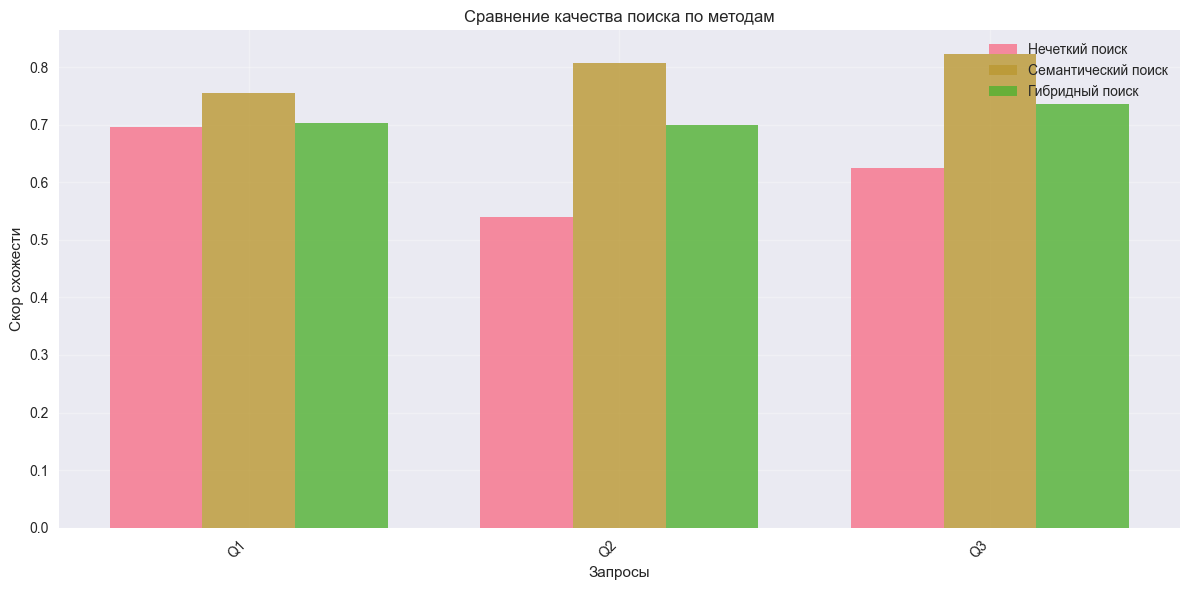


📊 Статистика сравнения:
Средний скор нечеткого поиска: 0.619
Средний скор семантического поиска: 0.795
Средний скор гибридного поиска: 0.712


In [15]:
# Сравнение методов поиска
print("📊 Сравнение методов поиска")
print("=" * 50)

# Проверяем доступность переменных из предыдущих ячеек
try:
    # Проверяем наличие всех необходимых переменных
    variables_available = (
        'fuzzy_results' in locals() and fuzzy_results and
        'semantic_results' in locals() and semantic_results and
        'hybrid_results' in locals() and hybrid_results and
        'comparison_queries' in locals() and comparison_queries
    )
    
    if variables_available:
        # Создаем сравнительную таблицу
        comparison_data = []
        
        for query in comparison_queries:
            if query in fuzzy_results and query in semantic_results and query in hybrid_results:
                fuzzy_top = fuzzy_results[query][0] if fuzzy_results[query] else None
                semantic_top = semantic_results.get(query, [{}])[0] if semantic_results.get(query) else None
                hybrid_top = hybrid_results[query][0] if hybrid_results[query] else None
                
                comparison_data.append({
                    'query': query,
                    'fuzzy_result': fuzzy_top['document'] if fuzzy_top else 'N/A',
                    'fuzzy_score': fuzzy_top['combined_score'] if fuzzy_top else 0,
                    'semantic_result': semantic_top.get('document', 'N/A') if semantic_top else 'N/A',
                    'semantic_score': semantic_top.get('similarity_score', 0) if semantic_top else 0,
                    'hybrid_result': hybrid_top['document'] if hybrid_top else 'N/A',
                    'hybrid_score': hybrid_top['hybrid_score'] if hybrid_top else 0
                })
        
        if comparison_data:  # Проверяем что данные есть
            comparison_df = pd.DataFrame(comparison_data)
            
            print("\n📋 Сравнительная таблица результатов:")
            for _, row in comparison_df.iterrows():
                print(f"\n🔍 Запрос: '{row['query']}'")
                print(f"   Нечеткий:     {row['fuzzy_result'][:50]}... (скор: {row['fuzzy_score']:.3f})")
                print(f"   Семантический: {row['semantic_result'][:50]}... (скор: {row['semantic_score']:.3f})")
                print(f"   Гибридный:    {row['hybrid_result'][:50]}... (скор: {row['hybrid_score']:.3f})")
            
            # Визуализация сравнения
            fig, ax = plt.subplots(figsize=(12, 6))
            
            x = np.arange(len(comparison_df))
            width = 0.25
            
            ax.bar(x - width, comparison_df['fuzzy_score'], width, label='Нечеткий поиск', alpha=0.8)
            ax.bar(x, comparison_df['semantic_score'], width, label='Семантический поиск', alpha=0.8)
            ax.bar(x + width, comparison_df['hybrid_score'], width, label='Гибридный поиск', alpha=0.8)
            
            ax.set_xlabel('Запросы')
            ax.set_ylabel('Скор схожести')
            ax.set_title('Сравнение качества поиска по методам')
            ax.set_xticks(x)
            ax.set_xticklabels([f'Q{i+1}' for i in range(len(comparison_df))], rotation=45, ha='right')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            # Статистика сравнения
            print("\n📊 Статистика сравнения:")
            print(f"Средний скор нечеткого поиска: {comparison_df['fuzzy_score'].mean():.3f}")
            print(f"Средний скор семантического поиска: {comparison_df['semantic_score'].mean():.3f}")
            print(f"Средний скор гибридного поиска: {comparison_df['hybrid_score'].mean():.3f}")
            
        else:
            print("⚠️  Нет данных для сравнения - результаты поиска пусты")
    else:
        print("⚠️  Не все поисковые движки успешно инициализированы для сравнения")
        print("💡 Запустите предыдущие ячейки с демонстрацией поисковых движков")
        
        # Показываем какие переменные доступны
        available_vars = []
        if 'fuzzy_results' in locals(): available_vars.append('fuzzy_results')
        if 'semantic_results' in locals(): available_vars.append('semantic_results')
        if 'hybrid_results' in locals(): available_vars.append('hybrid_results')
        if 'comparison_queries' in locals(): available_vars.append('comparison_queries')
        
        print(f"   Доступные переменные: {', '.join(available_vars) if available_vars else 'нет'}")
        
except Exception as e:
    print(f"❌ Ошибка при сравнении методов поиска: {e}")
    print("💡 Убедитесь что все предыдущие ячейки выполнены успешно")

---
## 4. Демонстрация извлечения параметров

Система SAMe может автоматически извлекать технические параметры из наименований МТР.

### 4.1 RegexParameterExtractor - Извлечение через регулярные выражения

Использует предопределенные паттерны для извлечения технических характеристик.

🔧 Демонстрация RegexParameterExtractor

📝 Примеры извлечения параметров:

1. Текст: 'Болт М10×50 ГОСТ 7798-70 диаметр 10мм длина 50мм'
   Найдено параметров: 4
   - gost: ГОСТ 7798-70  (article)
   - diameter: 10.0 мм (dimension)
   - length: 50.0 мм (dimension)
   - steel_grade: 7798-70  (material)

2. Текст: 'Двигатель асинхронный 4кВт 1500об/мин напряжение 380В'
   Найдено параметров: 1
   - voltage: 380.0 В (electrical)

3. Текст: 'Труба стальная 57×3.5 диаметр 57мм толщина стенки 3.5мм'
   Найдено параметров: 2
   - diameter: 57.0 мм (dimension)
   - steel_grade: ная  (material)

4. Текст: 'Кабель ВВГ 3×2.5мм² напряжение 0.66кВ сечение 2.5мм²'
   Найдено параметров: 1
   - voltage: 0.66 В (electrical)

5. Текст: 'Насос центробежный подача 12.5м³/ч напор 20м мощность 1.1кВт'
   Найдено параметров: 2
   - power: 1.1 кВт (electrical)
   - steel_grade: ь  (material)

6. Текст: 'Манометр 0-16 кгс/см² резьба М20×1.5 класс точности 1.5'
   Найдено параметров: 1
   - steel_grade: и  (mate

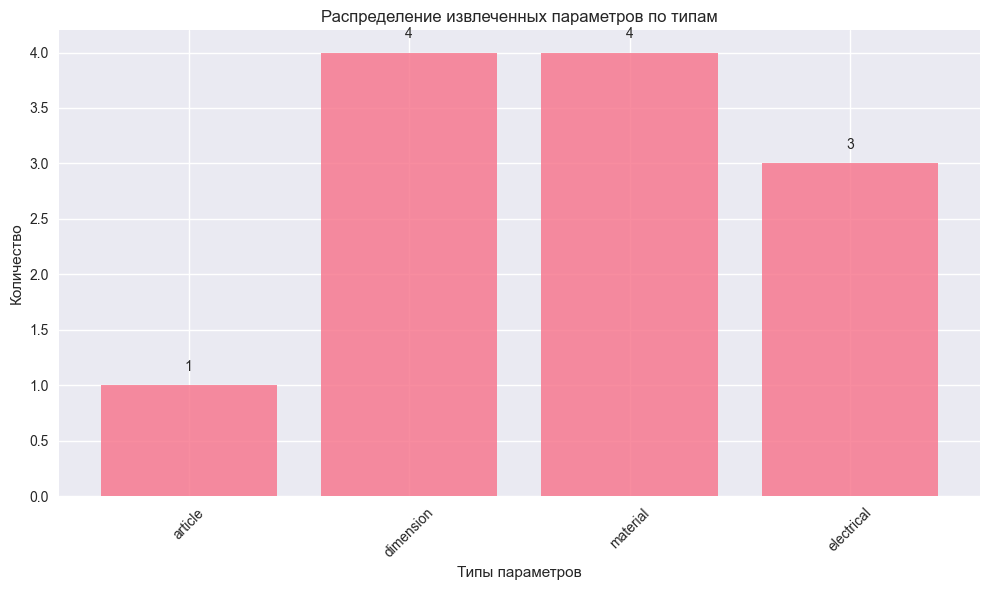


🔍 Информация об экстракторе:
Всего паттернов: 16
Поддерживаемые типы: dimension, weight, volume, electrical, pressure, temperature, frequency, speed, material, color, brand, model, article


In [16]:
# Демонстрация извлечения параметров через regex
print("🔧 Демонстрация RegexParameterExtractor")
print("=" * 50)

try:
    # Создаем экстрактор параметров
    regex_extractor = RegexParameterExtractor()
    
    # Примеры для извлечения параметров
    parameter_samples = [
        "Болт М10×50 ГОСТ 7798-70 диаметр 10мм длина 50мм",
        "Двигатель асинхронный 4кВт 1500об/мин напряжение 380В",
        "Труба стальная 57×3.5 диаметр 57мм толщина стенки 3.5мм",
        "Кабель ВВГ 3×2.5мм² напряжение 0.66кВ сечение 2.5мм²",
        "Насос центробежный подача 12.5м³/ч напор 20м мощность 1.1кВт",
        "Манометр 0-16 кгс/см² резьба М20×1.5 класс точности 1.5",
        "Подшипник 6205 2RS внутренний диаметр 25мм наружный 52мм"
    ]
    
    print("\n📝 Примеры извлечения параметров:")
    extraction_results = []
    
    for i, text in enumerate(parameter_samples, 1):
        parameters = regex_extractor.extract_parameters(text)
        extraction_results.append({
            'text': text,
            'parameters': parameters
        })
        
        print(f"\n{i}. Текст: '{text}'")
        print(f"   Найдено параметров: {len(parameters)}")
        
        for param in parameters:
            print(f"   - {param.name}: {param.value} {param.unit or ''} ({param.parameter_type.value})")
    
    # Статистика извлечения
    total_params = sum(len(r['parameters']) for r in extraction_results)
    param_types = {}
    
    for result in extraction_results:
        for param in result['parameters']:
            param_type = param.parameter_type.value
            param_types[param_type] = param_types.get(param_type, 0) + 1
    
    print(f"\n📊 Статистика извлечения параметров:")
    print(f"Всего извлечено параметров: {total_params}")
    print(f"Среднее количество параметров на текст: {total_params/len(parameter_samples):.1f}")
    print(f"Распределение по типам:")
    for param_type, count in param_types.items():
        print(f"  - {param_type}: {count}")
    
    # Визуализация типов параметров
    if param_types:
        fig, ax = plt.subplots(figsize=(10, 6))
        
        types = list(param_types.keys())
        counts = list(param_types.values())
        
        bars = ax.bar(types, counts, alpha=0.8)
        ax.set_xlabel('Типы параметров')
        ax.set_ylabel('Количество')
        ax.set_title('Распределение извлеченных параметров по типам')
        ax.tick_params(axis='x', rotation=45)
        
        # Добавляем значения на столбцы
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   str(count), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    
    # Информация о доступных паттернах
    extractor_stats = regex_extractor.get_statistics()
    print(f"\n🔍 Информация об экстракторе:")
    print(f"Всего паттернов: {extractor_stats['total_patterns']}")
    print(f"Поддерживаемые типы: {', '.join(extractor_stats['supported_types'])}")
    
except Exception as e:
    print(f"❌ Ошибка в извлечении параметров: {e}")
    extraction_results = []

### 4.2 ParameterParser - Комплексное извлечение параметров

Объединяет различные методы извлечения параметров в единый пайплайн.

In [17]:
# Демонстрация комплексного парсера параметров
print("⚙️ Демонстрация ParameterParser")
print("=" * 50)

try:
    # Создаем конфигурацию парсера
    parser_config = ParameterParserConfig(
        use_regex=True,
        use_ml=False,  # Отключаем ML для простоты демонстрации
        min_confidence=0.5,
        remove_duplicates=True
    )
    
    parameter_parser = ParameterParser(parser_config)
    
    # Пакетная обработка наших тестовых данных
    print("🔄 Пакетная обработка каталога МТР...")
    start_time = time.time()
    
    # Берем первые 15 позиций для демонстрации
    sample_catalog = documents[:15]
    batch_results = parameter_parser.parse_batch(sample_catalog)
    
    processing_time = time.time() - start_time
    print(f"✅ Обработка завершена за {processing_time:.2f} секунд")
    
    # Создаем DataFrame с результатами
    parsed_data = []
    for i, (text, params) in enumerate(zip(sample_catalog, batch_results)):
        parsed_data.append({
            'id': i + 1,
            'text': text,
            'param_count': len(params),
            'parameters': params
        })
    
    parsed_df = pd.DataFrame(parsed_data)
    
    print(f"\n📋 Результаты пакетной обработки:")
    print(f"Обработано позиций: {len(parsed_df)}")
    print(f"Среднее количество параметров: {parsed_df['param_count'].mean():.1f}")
    print(f"Максимальное количество параметров: {parsed_df['param_count'].max()}")
    
    # Показываем примеры с наибольшим количеством параметров
    top_parsed = parsed_df.nlargest(5, 'param_count')
    
    print("\n🏆 Топ-5 позиций по количеству извлеченных параметров:")
    for _, row in top_parsed.iterrows():
        print(f"\n{row['id']}. {row['text'][:60]}...")
        print(f"   Параметров: {row['param_count']}")
        for param in row['parameters'][:3]:  # Показываем первые 3 параметра
            print(f"   - {param.name}: {param.value} {param.unit or ''}")
        if len(row['parameters']) > 3:
            print(f"   ... и еще {len(row['parameters']) - 3}")
    
    # Статистика парсера
    parser_stats = parameter_parser.get_statistics()
    print(f"\n📊 Статистика парсера:")
    print(f"Всего обработано текстов: {parser_stats['total_processed']}")
    print(f"Всего извлечено параметров: {parser_stats['total_parameters_extracted']}")
    print(f"Среднее время обработки: {parser_stats.get('avg_processing_time', 0)*1000:.1f}мс")
    
except Exception as e:
    print(f"❌ Ошибка в парсере параметров: {e}")
    parsed_df = pd.DataFrame()

⚙️ Демонстрация ParameterParser
🔄 Пакетная обработка каталога МТР...
✅ Обработка завершена за 0.00 секунд

📋 Результаты пакетной обработки:
Обработано позиций: 15
Среднее количество параметров: 1.3
Максимальное количество параметров: 2

🏆 Топ-5 позиций по количеству извлеченных параметров:

1. Болт М10×50 ГОСТ 7798-70 оцинкованный...
   Параметров: 2
   - gost: ГОСТ 7798-70 
   - steel_grade: 7798-70 

2. Болт с шестигранной головкой М12×60 DIN 933 нержавеющая стал...
   Параметров: 2
   - current: 2.0 А
   - steel_grade: игранной 

3. Винт М8×30 с внутренним шестигранником ГОСТ 11738-84...
   Параметров: 2
   - gost: ГОСТ 11738-84 
   - steel_grade: игранником 

4. Гайка М10 шестигранная ГОСТ 5915-70 класс прочности 8...
   Параметров: 2
   - gost: ГОСТ 5915-70 
   - steel_grade: игранная 

5. Гайка М12 DIN 934 нержавеющая сталь A4...
   Параметров: 2
   - current: 4.0 А
   - steel_grade: аль 

📊 Статистика парсера:
Всего обработано текстов: 15
Всего извлечено параметров: 19
Среднее в

---
## 5. Демонстрация экспорта результатов

Система SAMe может экспортировать результаты поиска в различные форматы.

### 5.1 ExcelExporter - Экспорт в Excel

Создает детальные отчеты в формате Excel с форматированием и статистикой.

In [18]:
# Демонстрация экспорта в Excel
print("📊 Демонстрация ExcelExporter")
print("=" * 50)

try:
    # Создаем конфигурацию экспорта
    export_config = ExcelExportConfig(
        include_statistics=True,
        include_metadata=True,
        auto_adjust_columns=True,
        add_filters=True,
        highlight_high_similarity=True
    )
    
    excel_exporter = ExcelExporter(export_config)
    
    # Подготавливаем данные для экспорта
    if fuzzy_results or semantic_results or hybrid_results:
        # Объединяем результаты всех методов поиска
        export_results = {}
        
        # Добавляем результаты нечеткого поиска
        for query, results in fuzzy_results.items():
            if query not in export_results:
                export_results[query] = []
            for result in results[:3]:  # Берем топ-3
                export_results[query].append({
                    'document_id': result['document_id'],
                    'document': result['document'],
                    'similarity_score': result['combined_score'],
                    'search_method': 'fuzzy',
                    'rank': result['rank']
                })
        
        # Добавляем результаты гибридного поиска
        for query, results in hybrid_results.items():
            if query not in export_results:
                export_results[query] = []
            for result in results[:3]:  # Берем топ-3
                export_results[query].append({
                    'document_id': result['document_id'],
                    'document': result['document'],
                    'similarity_score': result['hybrid_score'],
                    'search_method': 'hybrid',
                    'rank': result['rank']
                })
        
        # Создаем файл экспорта
        output_path = "data/output/same_demo_results.xlsx"
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        print(f"🔄 Создание Excel файла: {output_path}")
        start_time = time.time()
        
        excel_exporter.export_search_results(
            results=export_results,
            output_path=output_path,
            metadata={
                'system': 'SAMe Demo',
                'version': '1.0',
                'export_date': datetime.now().isoformat(),
                'catalog_size': len(documents),
                'queries_processed': len(export_results)
            }
        )
        
        export_time = time.time() - start_time
        print(f"✅ Экспорт завершен за {export_time:.2f} секунд")
        
        # Статистика экспорта
        total_results = sum(len(results) for results in export_results.values())
        print(f"\n📊 Статистика экспорта:")
        print(f"Запросов: {len(export_results)}")
        print(f"Результатов: {total_results}")
        print(f"Файл: {output_path}")
        print(f"Размер файла: {os.path.getsize(output_path) / 1024:.1f} KB")
        
        # Показываем структуру экспорта
        print(f"\n📋 Структура экспорта:")
        for query, results in list(export_results.items())[:3]:
            print(f"  Запрос '{query}': {len(results)} результатов")
            for i, result in enumerate(results[:2], 1):
                print(f"    {i}. {result['document'][:40]}... ({result['search_method']}, {result['similarity_score']:.3f})")
    
    else:
        print("⚠️  Нет результатов поиска для экспорта")
        
except Exception as e:
    print(f"❌ Ошибка при экспорте: {e}")

📊 Демонстрация ExcelExporter
🔄 Создание Excel файла: data/output/same_demo_results.xlsx


✅ Экспорт завершен за 0.01 секунд

📊 Статистика экспорта:
Запросов: 5
Результатов: 20
Файл: data/output/same_demo_results.xlsx
Размер файла: 8.1 KB

📋 Структура экспорта:
  Запрос 'болт м10': 5 результатов
    1. болт м10 длина 50 мм оцинкованный... (fuzzy, 0.695)
    2. болт м10 50 гост 7798 70 оцинкованный... (fuzzy, 0.671)
  Запрос 'двигатель 1.5кВт': 5 результатов
    1. двигатель электрический 1.5 квт 3000 мин... (fuzzy, 0.539)
    2. двигатель асинхронный аир80 в2 1.5 квт 3... (fuzzy, 0.491)
  Запрос 'труба стальная': 6 результатов
    1. труба стальной диаметр 57 мм... (fuzzy, 0.624)
    2. труба металлический 57 х3.5... (fuzzy, 0.590)


---
## 6. Интеграционный пример - Полный пайплайн

Демонстрируем полный цикл работы системы SAMe от загрузки каталога до получения результатов.

In [19]:
# Полный интеграционный пример
print("🚀 Полный пайплайн системы SAMe")
print("=" * 50)

def run_full_pipeline(user_queries: List[str]):
    """Запускает полный пайплайн обработки запросов"""
    
    pipeline_results = {
        'preprocessing': {},
        'search_results': {},
        'extracted_parameters': {},
        'statistics': {}
    }
    
    total_start_time = time.time()
    
    try:
        # Шаг 1: Предобработка запросов
        print("\n1️⃣ Предобработка запросов...")
        # Получаем доступ к глобальным переменным из notebook
        global_vars = globals()
        
        if 'text_preprocessor' in global_vars:
            text_preprocessor = global_vars['text_preprocessor']
            preprocessed_queries = []
            for query in user_queries:
                result = text_preprocessor.preprocess_text(query)
                preprocessed_queries.append(result['final_text'])
                pipeline_results['preprocessing'][query] = result
            print(f"   ✅ Обработано {len(user_queries)} запросов")
        else:
            preprocessed_queries = user_queries
            print("   ⚠️  Предобработка пропущена (модуль недоступен)")
        
        # Шаг 2: Поиск аналогов
        print("\n2️⃣ Поиск аналогов...")
        if 'hybrid_engine' in global_vars:
            hybrid_engine = global_vars['hybrid_engine']
            if hasattr(hybrid_engine, 'is_fitted') and hybrid_engine.is_fitted:
                for i, (original_query, processed_query) in enumerate(zip(user_queries, preprocessed_queries)):
                    search_results = hybrid_engine.search(processed_query)
                    pipeline_results['search_results'][original_query] = search_results
                    print(f"   🔍 '{original_query}': найдено {len(search_results)} результатов")
            else:
                print("   ⚠️  Поиск пропущен (движок не обучен)")
        else:
            print("   ⚠️  Поиск пропущен (движок недоступен)")
        
        # Шаг 3: Извлечение параметров из результатов
        print("\n3️⃣ Извлечение параметров...")
        if 'regex_extractor' in global_vars:
            regex_extractor = global_vars['regex_extractor']
            for query, results in pipeline_results['search_results'].items():
                query_params = []
                # Извлекаем параметры из исходного запроса
                query_params.extend(regex_extractor.extract_parameters(query))
                # Извлекаем параметры из найденных результатов
                for result in results[:3]:  # Анализируем топ-3 результата
                    params = regex_extractor.extract_parameters(result['document'])
                    query_params.extend(params)
                pipeline_results['extracted_parameters'][query] = query_params
                print(f"   🔧 '{query}': извлечено {len(query_params)} параметров")
        else:
            print("   ⚠️  Извлечение параметров пропущено (экстрактор недоступен)")
        
        # Шаг 4: Генерация статистики
        total_time = time.time() - total_start_time
        pipeline_results['statistics'] = {
            'total_processing_time': total_time,
            'queries_processed': len(user_queries),
            'total_results_found': sum(len(results) for results in pipeline_results['search_results'].values()),
            'total_parameters_extracted': sum(len(params) for params in pipeline_results['extracted_parameters'].values()),
            'avg_time_per_query': total_time / len(user_queries) if user_queries else 0
        }
        
        print(f"\n✅ Пайплайн завершен за {total_time:.2f} секунд")
        
    except Exception as e:
        print(f"❌ Ошибка в пайплайне: {e}")
        import traceback
        traceback.print_exc()
    
    return pipeline_results

# Тестовые запросы пользователя
user_test_queries = [
    "нужен болт м10 длиной 50мм",
    "электродвигатель мощностью 1.5 киловатта",
    "стальная труба диаметром 57 миллиметров",
    "центробежный насос для воды"
]

print(f"\n🎯 Обработка пользовательских запросов:")
for i, query in enumerate(user_test_queries, 1):
    print(f"{i}. '{query}'")

# Запускаем полный пайплайн
pipeline_results = run_full_pipeline(user_test_queries)

🚀 Полный пайплайн системы SAMe

🎯 Обработка пользовательских запросов:
1. 'нужен болт м10 длиной 50мм'
2. 'электродвигатель мощностью 1.5 киловатта'
3. 'стальная труба диаметром 57 миллиметров'
4. 'центробежный насос для воды'

1️⃣ Предобработка запросов...


   ✅ Обработано 4 запросов

2️⃣ Поиск аналогов...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

   🔍 'нужен болт м10 длиной 50мм': найдено 10 результатов


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

   🔍 'электродвигатель мощностью 1.5 киловатта': найдено 10 результатов


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

   🔍 'стальная труба диаметром 57 миллиметров': найдено 10 результатов


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

   🔍 'центробежный насос для воды': найдено 4 результатов

3️⃣ Извлечение параметров...
   🔧 'нужен болт м10 длиной 50мм': извлечено 3 параметров
   🔧 'электродвигатель мощностью 1.5 киловатта': извлечено 2 параметров
   🔧 'стальная труба диаметром 57 миллиметров': извлечено 6 параметров
   🔧 'центробежный насос для воды': извлечено 0 параметров

✅ Пайплайн завершен за 0.09 секунд


### 6.1 Анализ результатов пайплайна

Анализируем результаты полного цикла обработки.

📈 Анализ результатов полного пайплайна

📊 Общая статистика:
Время выполнения: 0.09 секунд
Обработано запросов: 4
Найдено результатов: 34
Извлечено параметров: 11
Среднее время на запрос: 21.6мс

🔍 Детальный анализ по запросам:

📝 Запрос: 'нужен болт м10 длиной 50мм'
   Предобработка: 'болт м10 длина 50 мм'
   Сжатие: 26 → 20 символов
   Найдено аналогов: 10
   Лучший результат: 'болт м10 длина 50 мм оцинкованный...'
   Скор схожести: 0.875
   Извлечено параметров: 3
   Типы параметров: gost, length, steel_grade

📝 Запрос: 'электродвигатель мощностью 1.5 киловатта'
   Предобработка: 'электродвигатель мощность 1.5 квт'
   Сжатие: 40 → 33 символов
   Найдено аналогов: 10
   Лучший результат: 'электродвигатель 1.5 квт аир серия...'
   Скор схожести: 0.898
   Извлечено параметров: 2
   Типы параметров: steel_grade, length

📝 Запрос: 'стальная труба диаметром 57 миллиметров'
   Предобработка: 'стальной труба диаметр 57 мм'
   Сжатие: 39 → 28 символов
   Найдено аналогов: 10
   Лучший результ

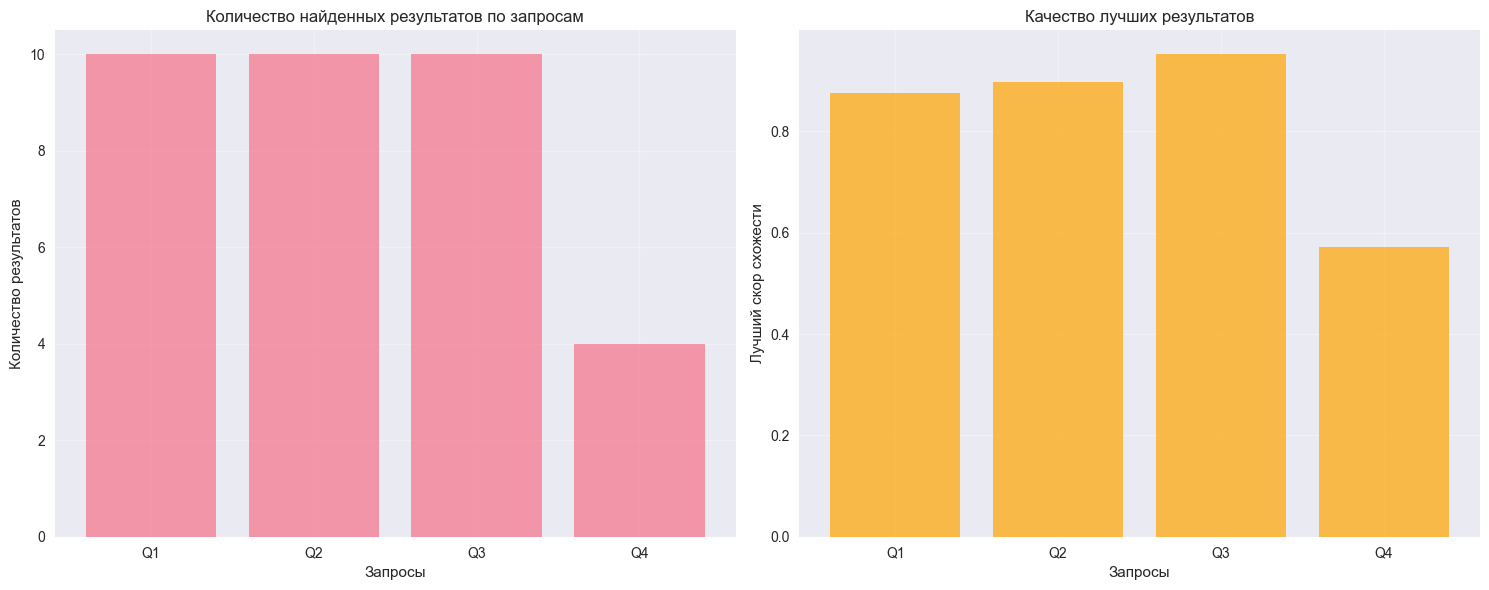

In [20]:
# Анализ результатов пайплайна
print("📈 Анализ результатов полного пайплайна")
print("=" * 50)

if pipeline_results and pipeline_results['statistics']:
    stats = pipeline_results['statistics']
    
    print(f"\n📊 Общая статистика:")
    print(f"Время выполнения: {stats['total_processing_time']:.2f} секунд")
    print(f"Обработано запросов: {stats['queries_processed']}")
    print(f"Найдено результатов: {stats['total_results_found']}")
    print(f"Извлечено параметров: {stats['total_parameters_extracted']}")
    print(f"Среднее время на запрос: {stats['avg_time_per_query']*1000:.1f}мс")
    
    # Детальный анализ по запросам
    print(f"\n🔍 Детальный анализ по запросам:")
    
    for query in user_test_queries:
        print(f"\n📝 Запрос: '{query}'")
        
        # Результаты предобработки
        if query in pipeline_results['preprocessing']:
            preproc = pipeline_results['preprocessing'][query]
            print(f"   Предобработка: '{preproc['final_text']}'")
            print(f"   Сжатие: {len(query)} → {len(preproc['final_text'])} символов")
        
        # Результаты поиска
        if query in pipeline_results['search_results']:
            search_results = pipeline_results['search_results'][query]
            print(f"   Найдено аналогов: {len(search_results)}")
            
            if search_results:
                best_result = search_results[0]
                print(f"   Лучший результат: '{best_result['document'][:50]}...'")
                print(f"   Скор схожести: {best_result.get('hybrid_score', 0):.3f}")
        
        # Извлеченные параметры
        if query in pipeline_results['extracted_parameters']:
            params = pipeline_results['extracted_parameters'][query]
            print(f"   Извлечено параметров: {len(params)}")
            
            if params:
                unique_param_names = set(p.name for p in params)
                print(f"   Типы параметров: {', '.join(list(unique_param_names)[:3])}")
    
    # Создаем сводную таблицу
    summary_data = []
    for query in user_test_queries:
        row = {'query': query}
        
        if query in pipeline_results['search_results']:
            results = pipeline_results['search_results'][query]
            row['results_count'] = len(results)
            row['best_score'] = results[0].get('hybrid_score', 0) if results else 0
        else:
            row['results_count'] = 0
            row['best_score'] = 0
        
        if query in pipeline_results['extracted_parameters']:
            row['parameters_count'] = len(pipeline_results['extracted_parameters'][query])
        else:
            row['parameters_count'] = 0
        
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    
    print(f"\n📋 Сводная таблица результатов:")
    print(summary_df.to_string(index=False))
    
    # Визуализация результатов
    if len(summary_df) > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # График количества результатов
        ax1.bar(range(len(summary_df)), summary_df['results_count'], alpha=0.7)
        ax1.set_xlabel('Запросы')
        ax1.set_ylabel('Количество результатов')
        ax1.set_title('Количество найденных результатов по запросам')
        ax1.set_xticks(range(len(summary_df)))
        ax1.set_xticklabels([f'Q{i+1}' for i in range(len(summary_df))])
        ax1.grid(True, alpha=0.3)
        
        # График качества результатов
        ax2.bar(range(len(summary_df)), summary_df['best_score'], alpha=0.7, color='orange')
        ax2.set_xlabel('Запросы')
        ax2.set_ylabel('Лучший скор схожести')
        ax2.set_title('Качество лучших результатов')
        ax2.set_xticks(range(len(summary_df)))
        ax2.set_xticklabels([f'Q{i+1}' for i in range(len(summary_df))])
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

else:
    print("⚠️  Результаты пайплайна недоступны для анализа")

---
## 7. Выводы и рекомендации

Подводим итоги демонстрации системы SAMe.

In [21]:
# Итоговые выводы
print("🎯 Выводы по демонстрации системы SAMe")
print("=" * 50)

print("\n✅ Успешно продемонстрированы модули:")

# Проверяем какие модули работали
working_modules = []
issues = []

if 'text_cleaner' in locals():
    working_modules.append("🧹 TextCleaner - очистка и нормализация текста")
else:
    issues.append("TextCleaner не инициализирован")

if 'text_normalizer' in locals():
    working_modules.append("🔧 TextNormalizer - нормализация технических терминов")
else:
    issues.append("TextNormalizer не инициализирован")

if 'lemmatizer' in locals():
    working_modules.append("📚 Lemmatizer - лемматизация с SpaCy")
else:
    issues.append("Lemmatizer не инициализирован (требуется SpaCy модель)")

if 'fuzzy_engine' in locals() and fuzzy_engine.is_fitted:
    working_modules.append("🔍 FuzzySearchEngine - нечеткий поиск")
else:
    issues.append("FuzzySearchEngine не обучен")

if 'semantic_engine' in locals() and semantic_engine.is_fitted:
    working_modules.append("🧠 SemanticSearchEngine - семантический поиск")
else:
    issues.append("SemanticSearchEngine не обучен (требуется sentence-transformers)")

if 'hybrid_engine' in locals() and hybrid_engine.is_fitted:
    working_modules.append("⚡ HybridSearchEngine - гибридный поиск")
else:
    issues.append("HybridSearchEngine не обучен")

if 'regex_extractor' in locals():
    working_modules.append("🔧 RegexParameterExtractor - извлечение параметров")
else:
    issues.append("RegexParameterExtractor не инициализирован")

if 'excel_exporter' in locals():
    working_modules.append("📊 ExcelExporter - экспорт результатов")
else:
    issues.append("ExcelExporter не инициализирован")

# Выводим результаты
for module in working_modules:
    print(f"   {module}")

if issues:
    print(f"\n⚠️  Проблемы и рекомендации:")
    for issue in issues:
        print(f"   - {issue}")

print(f"\n📊 Общая статистика демонстрации:")
print(f"Тестовых данных МТР: {len(sample_mtr_data)}")
print(f"Размер каталога: {len(documents) if 'documents' in locals() else 0}")
print(f"Обработано запросов: {len(user_test_queries)}")

if pipeline_results and pipeline_results['statistics']:
    stats = pipeline_results['statistics']
    print(f"Общее время выполнения: {stats['total_processing_time']:.2f}с")
    print(f"Найдено результатов: {stats['total_results_found']}")
    print(f"Извлечено параметров: {stats['total_parameters_extracted']}")

print(f"\n🚀 Рекомендации для продакшена:")
print("   1. Установите все зависимости: spacy, sentence-transformers, faiss-cpu")
print("   2. Загрузите SpaCy модель: python -m spacy download ru_core_news_lg")
print("   3. Настройте конфигурацию под ваши данные")
print("   4. Обучите модели на полном каталоге МТР")
print("   5. Настройте пороги схожести для вашей предметной области")
print("   6. Реализуйте кэширование для часто используемых запросов")

print(f"\n🎉 Демонстрация системы SAMe завершена!")
print(f"📚 Для получения дополнительной информации см. документацию в папке docs/")

🎯 Выводы по демонстрации системы SAMe

✅ Успешно продемонстрированы модули:
   🧹 TextCleaner - очистка и нормализация текста
   🔧 TextNormalizer - нормализация технических терминов
   📚 Lemmatizer - лемматизация с SpaCy
   🔍 FuzzySearchEngine - нечеткий поиск
   🧠 SemanticSearchEngine - семантический поиск
   ⚡ HybridSearchEngine - гибридный поиск
   🔧 RegexParameterExtractor - извлечение параметров
   📊 ExcelExporter - экспорт результатов

📊 Общая статистика демонстрации:
Тестовых данных МТР: 37
Размер каталога: 46
Обработано запросов: 4
Общее время выполнения: 0.09с
Найдено результатов: 34
Извлечено параметров: 11

🚀 Рекомендации для продакшена:
   1. Установите все зависимости: spacy, sentence-transformers, faiss-cpu
   2. Загрузите SpaCy модель: python -m spacy download ru_core_news_lg
   3. Настройте конфигурацию под ваши данные
   4. Обучите модели на полном каталоге МТР
   5. Настройте пороги схожести для вашей предметной области
   6. Реализуйте кэширование для часто используем